# this code have been written by 

* **Ahmad Almouse**
* **Maha Ismail**
* **Shaker Abu Rassa'**

project presentation [slides](https://www.canva.com/design/DAFauT3Z0b0/iuoXBO1OcW9wM82iO6mPjA/view?utm_content=DAFauT3Z0b0&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink)

# import the needed libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import datetime
import plotly.express as px

# reading the data 

In [3]:
df=pd.read_csv('food_prices_jor.csv')
population_df=pd.read_csv("Population in Jordan.csv")
deaths_df=pd.read_excel('number of war deaths.xlsx')
jordan_covid_df=pd.read_csv('jordan-covid-data.csv')
world_covid_df=pd.read_csv('world-covid-data.csv')
df.head(5)

,date,market,category,commodity,unit,price,H-date
0,1/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,10/02/1432
1,1/15/2011,National Average,cereals and tubers,Rice (imported),KG,0.90,11/02/1432
2,1/15/2011,National Average,oil and fats,Oil (vegetable),1.8 L,1.50,12/02/1432
3,1/15/2011,National Average,pulses and nuts,Pulses,KG,1.20,13/02/1432
4,2/15/2011,National Average,cereals and tubers,Bread (pita),KG,0.16,14/02/1432


In [4]:
catergies=df['category'].value_counts().index
thecategory=catergies[6]
inn = 0
colors =['green' , 'magenta' ,'turquoise' ,'chartreuse','black','moccasin', 'olive','blueviolet']
markets=['Al Karak','Amman','Irbid' ,'Al Aqaba','Maan']

# box plot for all categories 

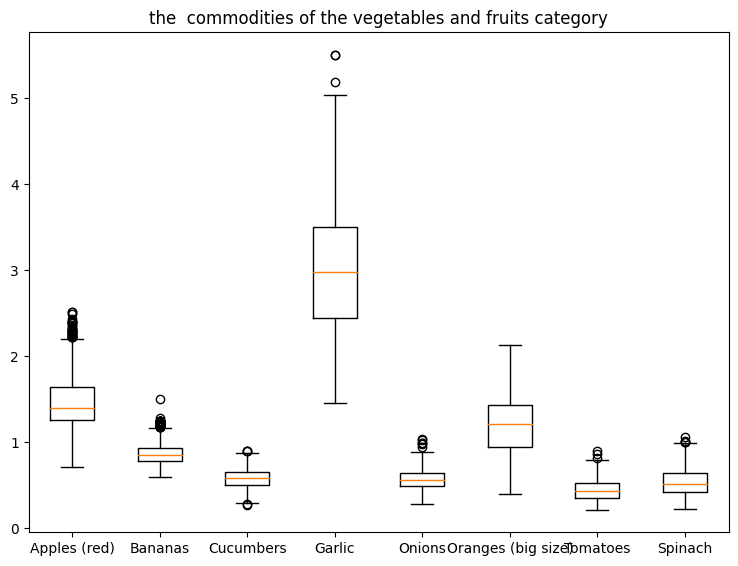

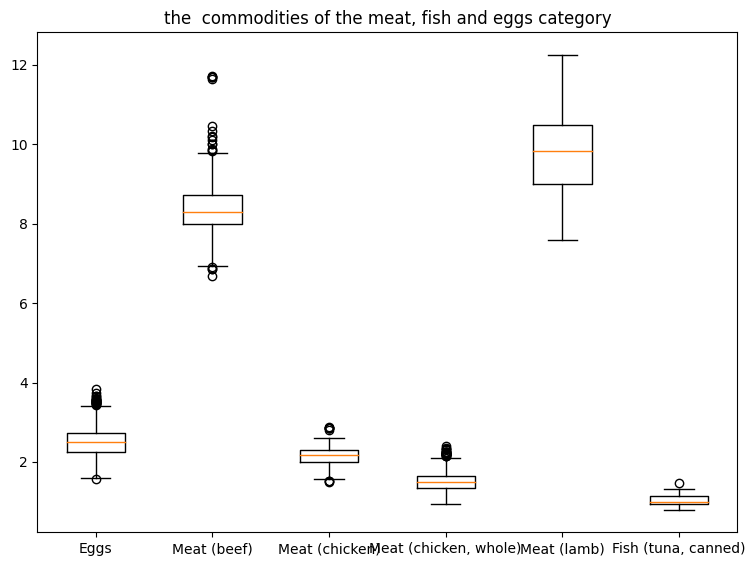

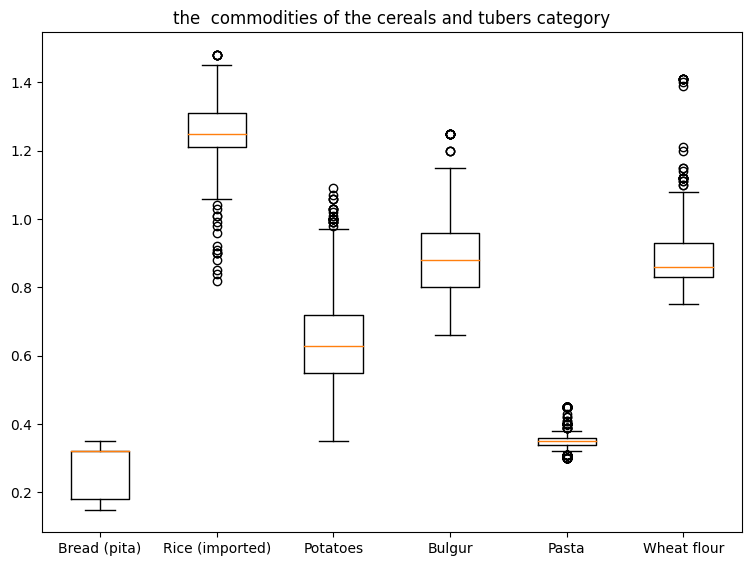

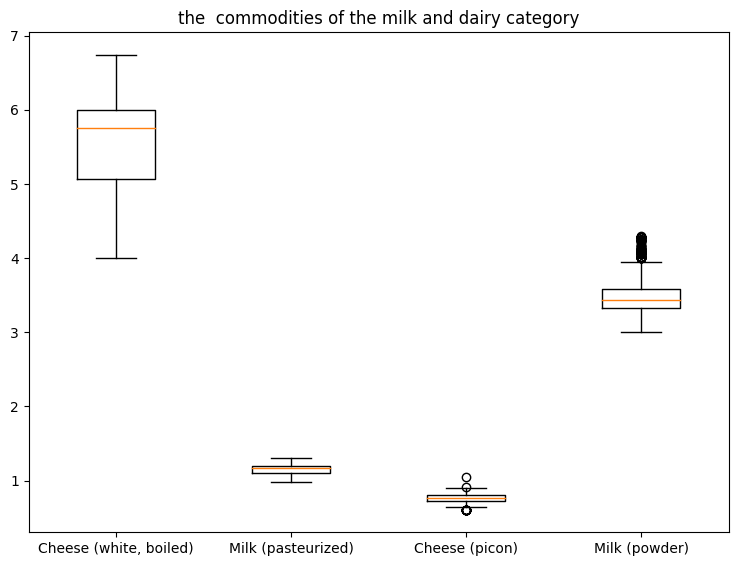

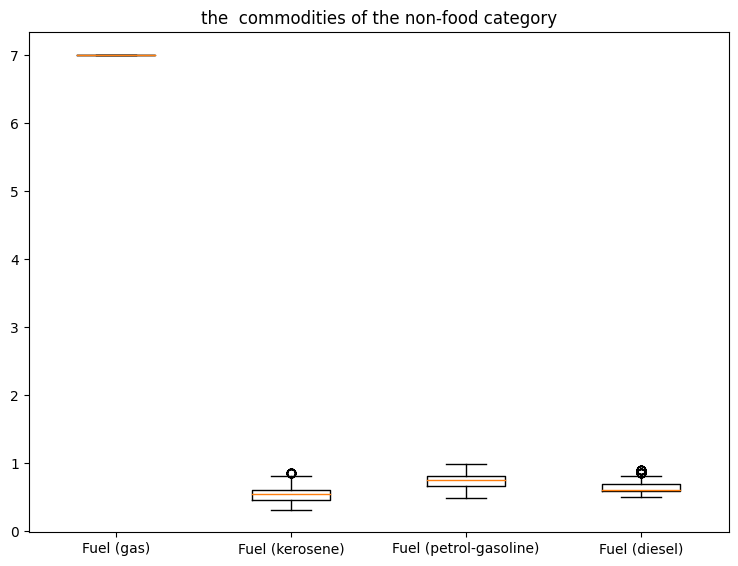

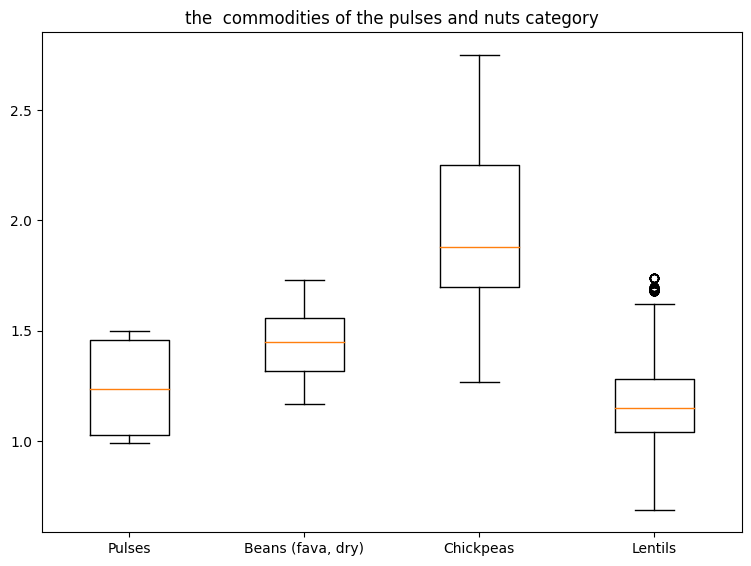

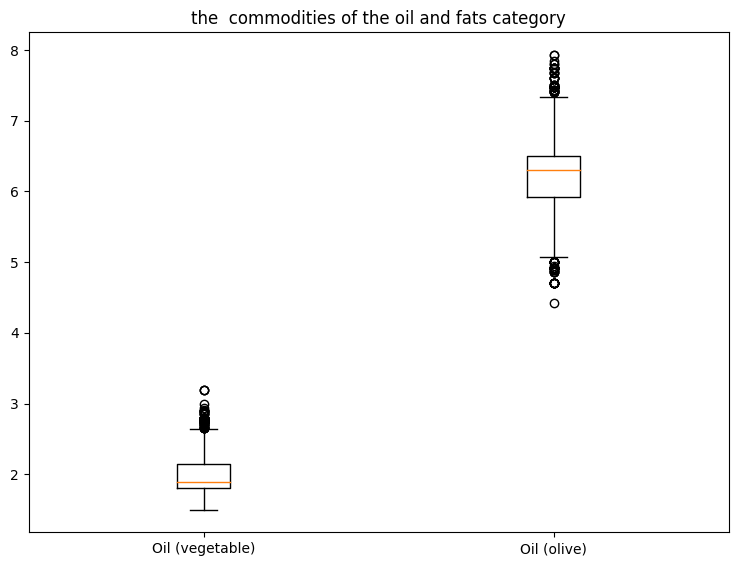

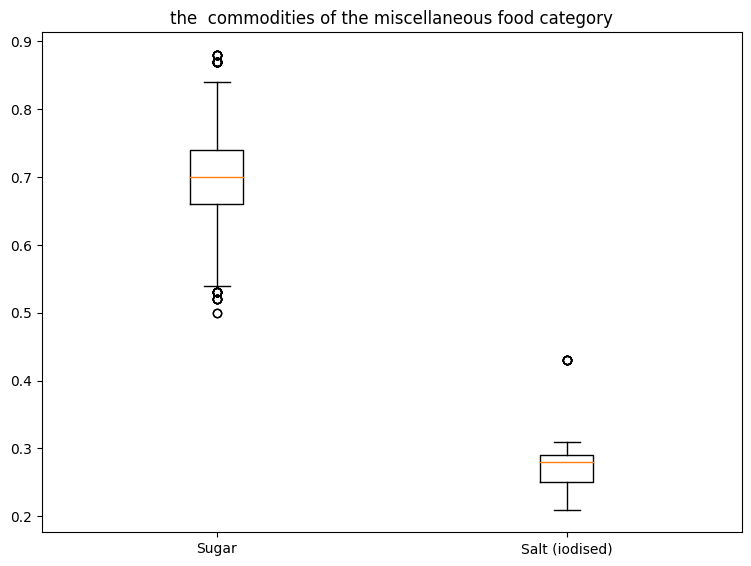

In [5]:
for category in catergies:
    fig = plt.figure(figsize =(7,5))
    ax = fig.add_axes([0, 0, 1, 1])

    all_commodities=df[df['category']==category]['commodity'].unique()
    data=[]

    for commodity in all_commodities:
        data.append(df[df['commodity']==commodity]['price'])
    
    plt.title(f'the  commodities of the {category} category')
    plt.boxplot(data,labels=all_commodities)
    # plt.savefig(f'the  commodities of the {category} category')
    plt.show()

# data prep

## df prep

In [6]:
all_categories=df['category'].unique()
for category in all_categories:

    all_commodities=df[df['category']==category]['commodity'].unique()
    data=[]

    for commodity in all_commodities:
        data.append(df[df['commodity']==commodity]['price'])
        data2 = df[df['commodity']==commodity]['price']
        # Calculate the interquartile range
        Q1 = data2.quantile(0.25)
        Q3 = data2.quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        # Calculate the upper whisker
        upper_whisker = Q3 + 1.5*IQR

        # Calculate the lower whisker
        lower_whisker = Q1 - 1.5*IQR

        # Create a mask to identify outliers
        mask = data2[(data2 <= (lower_whisker*0.60)) | (data2 >= (upper_whisker*1.40))]

        # # Identify the farthest outlier
        print(commodity,": ")
        print(upper_whisker)
        print(mask)

Bread (pita) : 
0.53
Series([], Name: price, dtype: float64)
Rice (imported) : 
1.4600000000000002
Series([], Name: price, dtype: float64)
Potatoes : 
0.9749999999999999
Series([], Name: price, dtype: float64)
Bulgur : 
1.1999999999999997
Series([], Name: price, dtype: float64)
Pasta : 
0.3899999999999999
Series([], Name: price, dtype: float64)
Wheat flour : 
1.08
Series([], Name: price, dtype: float64)
Oil (vegetable) : 
2.6437500000000003
Series([], Name: price, dtype: float64)
Oil (olive) : 
7.37
Series([], Name: price, dtype: float64)
Pulses : 
2.09875
Series([], Name: price, dtype: float64)
Beans (fava, dry) : 
1.92
Series([], Name: price, dtype: float64)
Chickpeas : 
3.075
Series([], Name: price, dtype: float64)
Lentils : 
1.6400000000000001
Series([], Name: price, dtype: float64)
Eggs : 
3.410000000000001
Series([], Name: price, dtype: float64)
Meat (beef) : 
9.8
Series([], Name: price, dtype: float64)
Meat (chicken) : 
2.7499999999999996
Series([], Name: price, dtype: float64)


In [7]:
# df['year']=df['date'].apply(lambda x: int(str(x).split(sep='/')[2]))
# df['month']=df['date'].apply(lambda x: int(x.split(sep='/')[0]))
df.drop_duplicates(inplace=True) # droping the duplicates if there is any

df['date'] = pd.to_datetime(df['date']).dt.to_period('M') # to make new columns year , month
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year 

df = df.loc[df.year > 2011 ] # filltering the data 

df['H-month']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]))  # to make new columns hijri month
df['H-year']=df['H-date'].apply(lambda x :int(x.split(sep='/')[2]))  # to make new columns hijri month
df['is_ramdan']=df['H-date'].apply(lambda x :int(x.split(sep='/')[1]) in [8,9,10]) # to make new columns with true false values (true when hijri months is equal to 8,9,10)

df.drop(['H-date'],axis=1,inplace=True) # droping the un needed columns 




In [8]:
df.head(5)

,date,market,category,commodity,unit,price,month,year,H-month,H-year,is_ramdan
43,2012-01,National Average,cereals and tubers,Bread (pita),KG,0.16,1,2012,2,1433,False
44,2012-01,National Average,cereals and tubers,Rice (imported),KG,0.92,1,2012,2,1433,False
45,2012-01,National Average,oil and fats,Oil (vegetable),1.8 L,1.80,1,2012,2,1433,False
46,2012-01,National Average,pulses and nuts,Pulses,KG,0.99,1,2012,2,1433,False
47,2012-02,National Average,cereals and tubers,Bread (pita),KG,0.16,2,2012,3,1433,False


## population_df prep


In [9]:
population_df=df[(df['category']==thecategory) ].groupby('year')['price'].mean().reset_index(name='avg_prices').join(population_df).drop('Year',axis=1)
population_df['annual_change_avg_prices']=population_df['avg_prices'].pct_change(periods=1)*100
# | (df['commodity']=='Rice (imported)') | (df['category']=='vegetables and fruits')

## deaths_df prep

In [10]:
deaths_df=df[(df['category']==thecategory)].groupby('year')['price'].mean().reset_index(name='avg_prices').join(deaths_df).drop('Year',axis=1)


## jordan covid df prep

In [11]:
jordan_covid_df.fillna(0,inplace=True) # replace nulls with 0

jordan_covid_df.fillna(0,inplace=True) # replace nulls with 0

jordan_covid_df['date'] = pd.to_datetime(jordan_covid_df['date'], format='%m/%d/%Y').dt.to_period('M')

jordan_covid_df.drop(columns=['iso_code','continent','location'],axis=1,inplace=True) # drop the unneeded columns

jordan_covid_df=jordan_covid_df.groupby('date')[['new_cases','new_deaths']].sum().reset_index(names=['date','new_cases','new_deaths']) # calculating the new cases and deaths for every month

jordan_covid_df['avg_prices']=df[(df['category']==thecategory)].groupby(['year','month'])['price'].mean().reset_index(name='avg_prices').drop(['year','month'],axis=1)

jordan_covid_df['monthly_change_avg_prices']=jordan_covid_df['avg_prices'].pct_change(periods=1)*100
jordan_covid_df['monthly_change_new_cases']=jordan_covid_df['new_cases'].pct_change(periods=1)*100
jordan_covid_df['monthly_change_new_deaths']=jordan_covid_df['new_deaths'].pct_change(periods=1)*100

## world covid df prep

In [12]:
world_covid_df.fillna(0,inplace=True) # replace nulls with 0

world_covid_df.fillna(0,inplace=True) # replace nulls with 0

world_covid_df['date'] = pd.to_datetime(world_covid_df['date'], format='%m/%d/%Y').dt.to_period('M')

world_covid_df.drop(columns=['iso_code','continent','location'],axis=1,inplace=True) # drop the unneeded columns

world_covid_df=world_covid_df.groupby('date')[['new_cases','new_deaths']].sum().reset_index(names=['date','new_cases','new_deaths']) # calculating the new cases and deaths for every month

world_covid_df['avg_prices']=df[(df['category']==thecategory)].groupby(['year','month'])['price'].mean().reset_index(name='avg_prices').drop(['year','month'],axis=1)

world_covid_df['monthly_change_avg_prices']=world_covid_df['avg_prices'].pct_change(periods=1)*100
world_covid_df['monthly_change_new_cases']=world_covid_df['new_cases'].pct_change(periods=1)*100
world_covid_df['monthly_change_new_deaths']=world_covid_df['new_deaths'].pct_change(periods=1)*100

# correlation

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\116032677.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df2.corr()


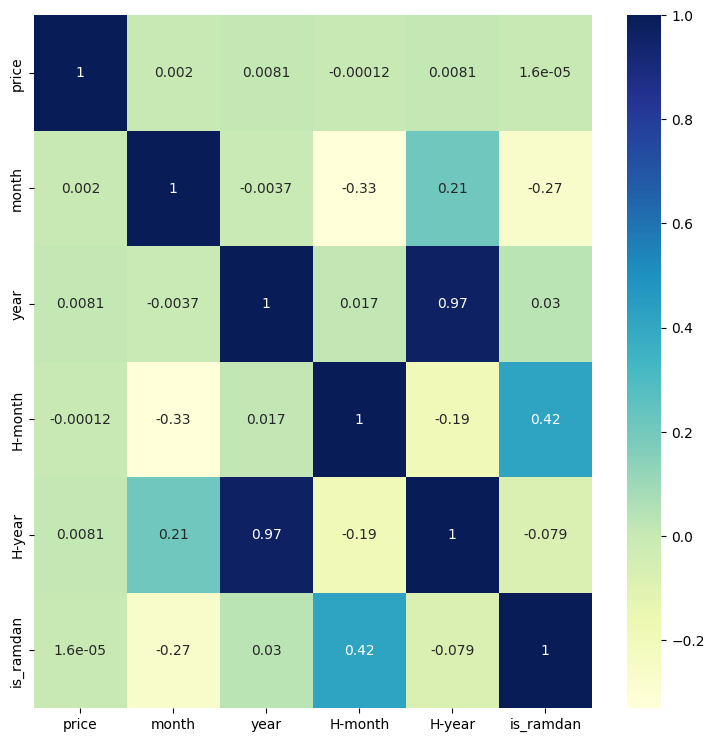

In [13]:
#Get correlation of each features in dataset
df2=df[df['year']>2016]
corrmat = df2.corr()
top_corr = features = corrmat.index
plt.figure(figsize = (9,9))
# It is better to draw a heatmap 
g = sns.heatmap(df2[top_corr].corr(), annot=True, cmap='YlGnBu')

# corrmat = df.corr()
# top_corr = features = corrmat.index
# plt.figure(figsize = (9,9))
# # It is better to draw a heatmap 
# g = sns.heatmap(df[top_corr].corr(), annot=True, cmap='YlGnBu')

# the relation between time and prices

In [14]:

# fig = plt.figure(figsize=(10,6))
fig = px.treemap(df, path=[px.Constant("all"), 'category', 'commodity'], values='price', height=800, width=1300)
fig.update_traces(root_color="lightgrey")
# fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
# fig.data[0]['textfont']['size'] = 40
fig.show()

In [15]:
all_categories=catergies
avg_prices={}

for category in all_categories:
    avg_prices.update({category:df[df['category']==category].groupby('year')['price'].mean().reset_index(name=f'price')})
    

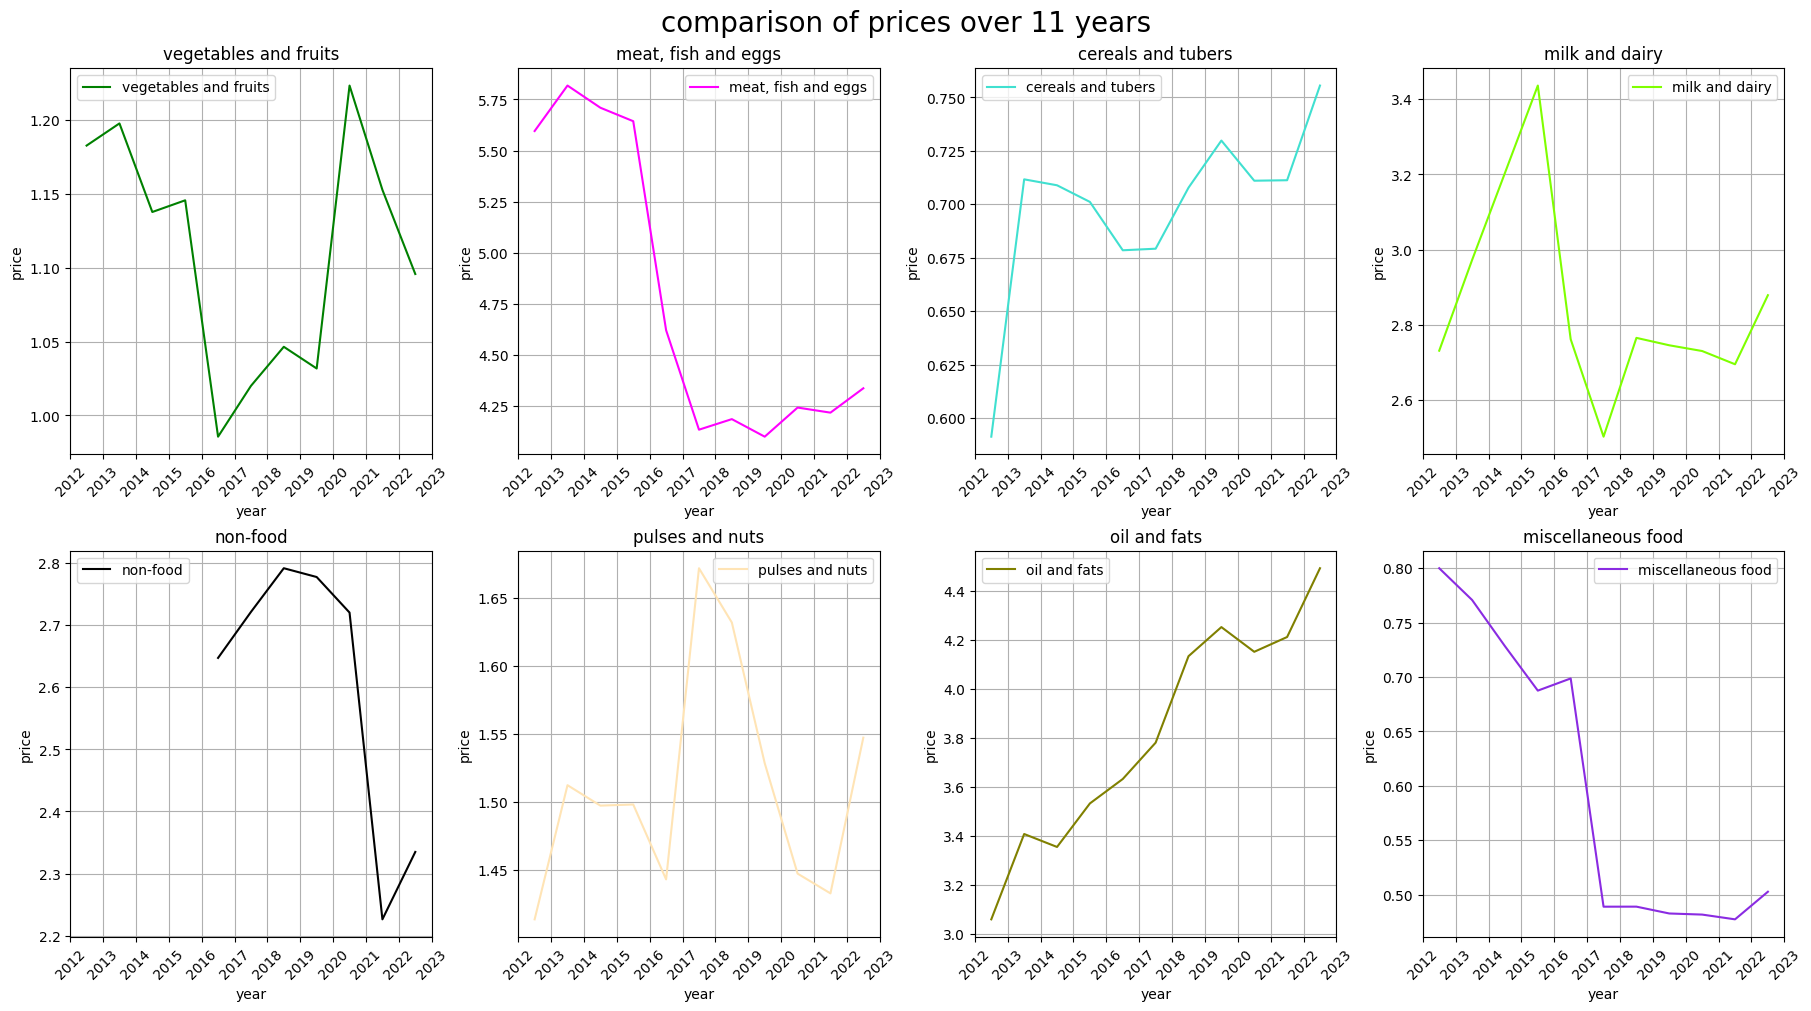

In [16]:
j=0

fig, axs = plt.subplots(2, 4, figsize=(18, 10), constrained_layout=True)
fig.suptitle('comparison of prices over 11 years',fontsize=20)
for ax,category_name in  zip(axs.flat,avg_prices):
    x = avg_prices[category_name]['year']
    y = avg_prices[category_name]['price']
    ax.plot(x+0.5,y,label=category_name,color=colors[j])
    ax.grid()
    ax.set_xlabel('year')
    ax.set_ylabel('price')
    # ax.axhline(y=0, lw=1.5, color='k',alpha=1)
    # ax.set_ylim([0,10])
    ax.set_xticks(np.append(df['year'].unique(),2023))
    ax.set_xticklabels(np.append(df['year'].unique(),2023),rotation=45)  
    # ax.set_yticklabels([" ","-30 %","-20 %","-10 %","0","10 %","20 %","30 %"])  
    ax.set_title(category_name)
    ax.legend()
    j+=1


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2682678891.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



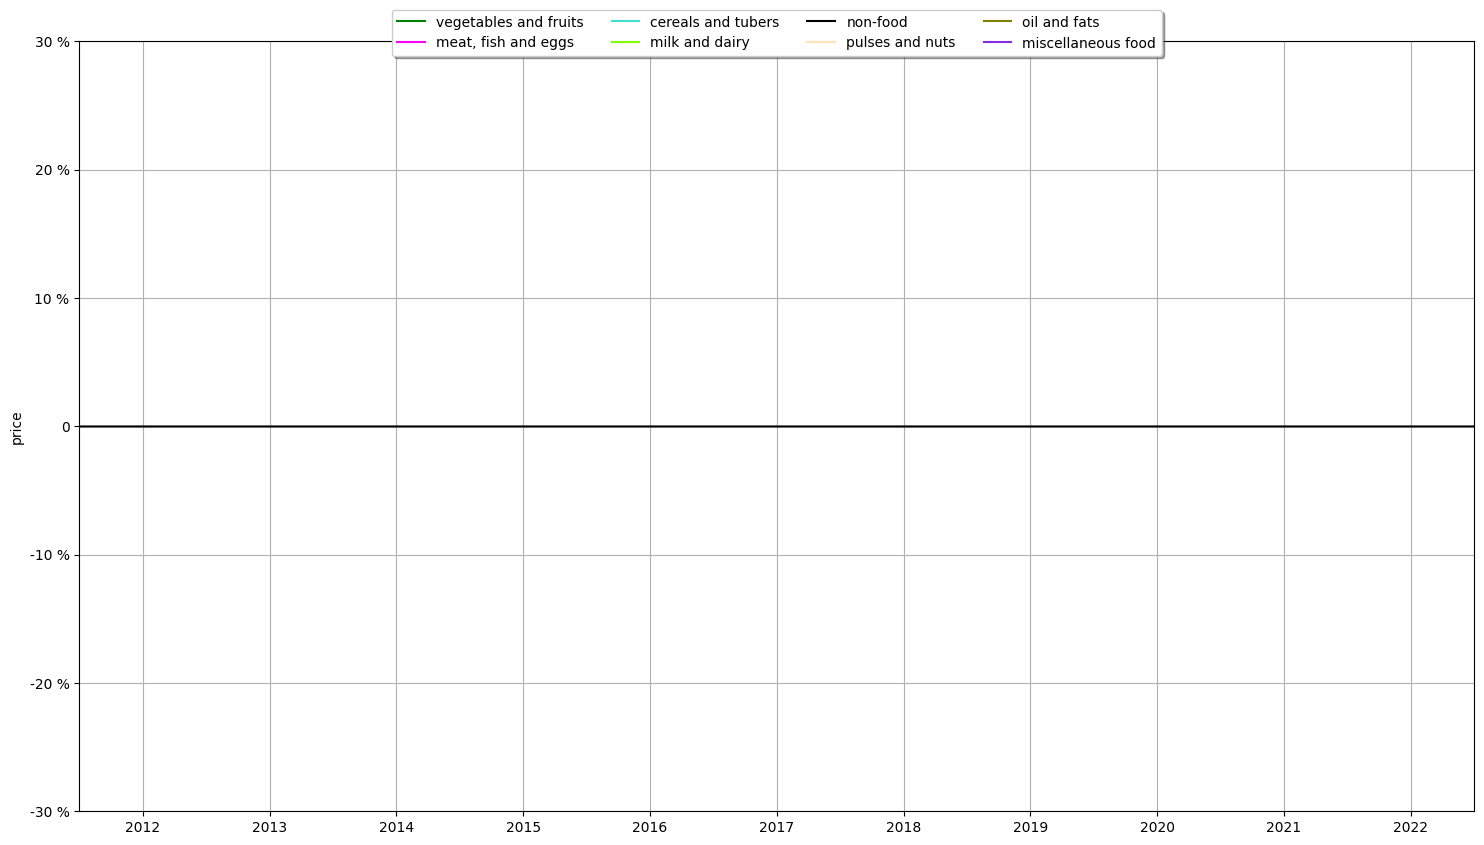

In [17]:
fig, ax = plt.subplots()
fig.set_figwidth(18)
fig.set_figheight(10)
i=0
for category_name in avg_prices:
    x = avg_prices[category_name]['year']
    y = avg_prices[category_name]['price']*100

    # ax.title(f'price of {category_name}')
    ax.set_yticklabels(["-30 %","-20 %","-10 %","0","10 %","20 %","30 %"])  
    ax.set_xticks(df['year'].unique())
    ax.set_ylabel('price')
    ax.plot(x,y,label=category_name,color=colors[i])
    ax.axhline(y=0, lw=1, color='k',alpha=.5)
    ax.tick_params(axis='y')
    ax.set_ylim([-30,30])
    # ax.annotate(xy=(x.values[-1]+0.3,y.values[-1]), xytext=(0,0), textcoords='offset points', text=category_name,arrowprops=dict(arrowstyle="-", color='r', lw=0.5))
    i+=1

# ax.set_xticks(df['year'].unique())
# ax.set_xticklabels(df['year'].unique())
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),ncol=4, fancybox=True, shadow=True)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4,fancybox=True, shadow=True)
plt.grid()
plt.show()

# hypothesis testing 

## the relation between covid and the prices

### the relation between **jordan** covid cases , deaths and the prices

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\4291681732.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



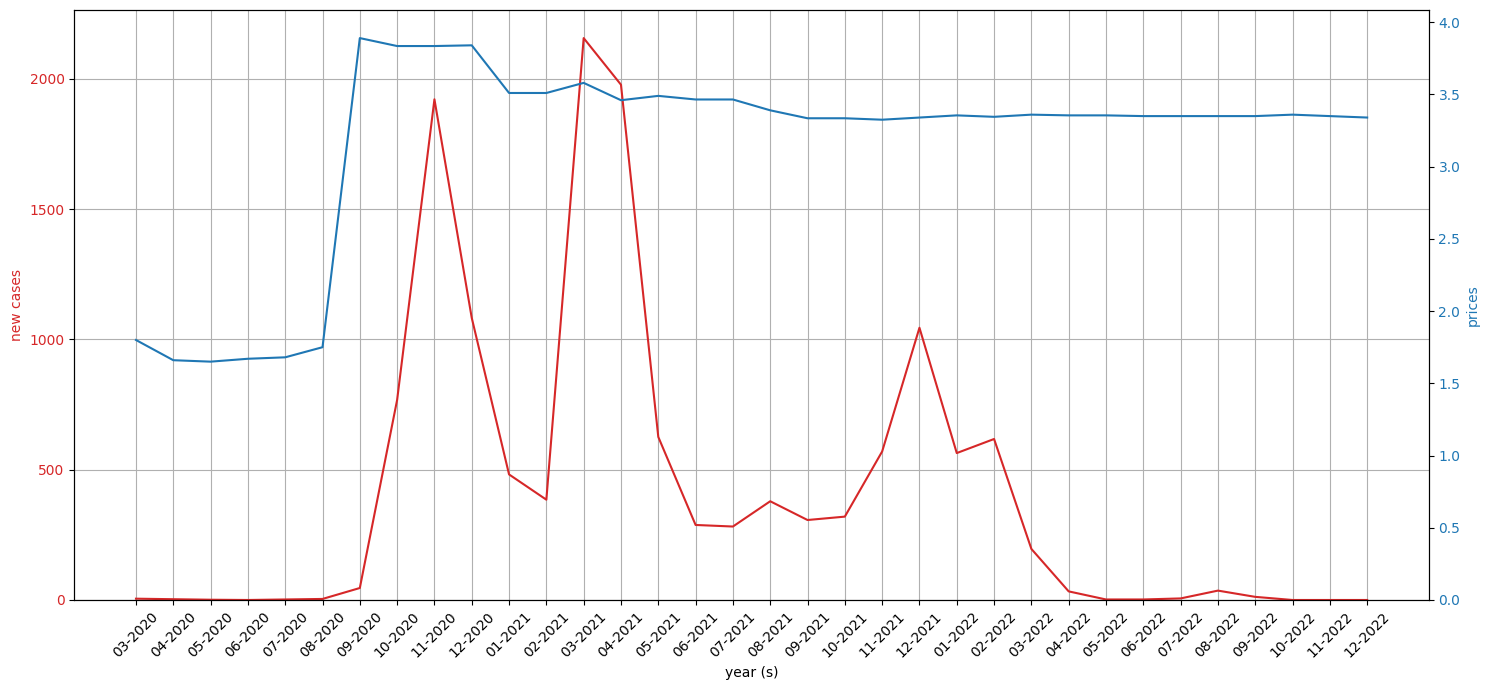

In [18]:

t = jordan_covid_df['date'].dt.strftime('%m-%Y') 
data2 = jordan_covid_df['avg_prices']
data1 = jordan_covid_df['new_deaths']

fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)


color = 'tab:red'
ax1.set_xlabel('year (s)')
ax1.set_xticklabels(t,rotation = 45)
ax1.set_ylabel('new cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,max(data1)+max(data1)*0.05])

plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,max(data2)+max(data2)*0.05])

# ax2.set_ylim([0,10])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.grid()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2690930227.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



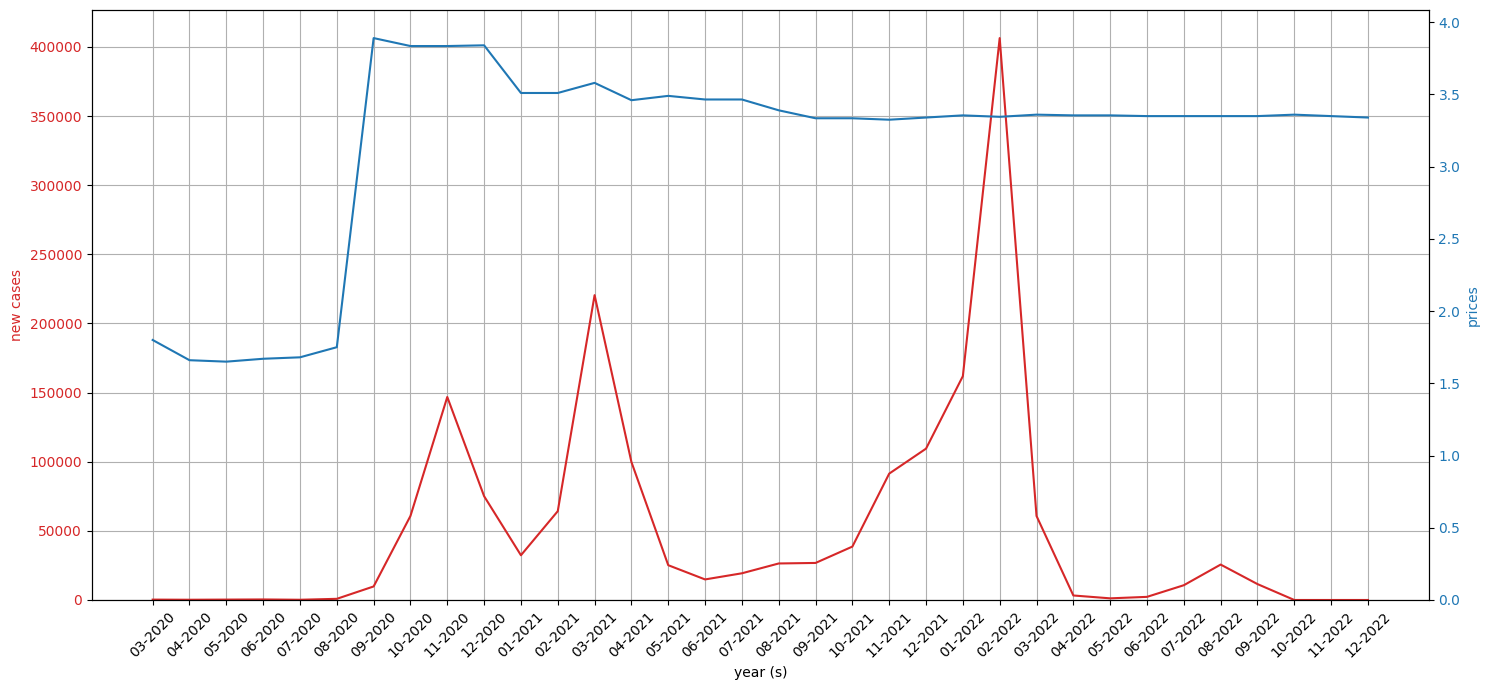

In [19]:

t = jordan_covid_df['date'].dt.strftime('%m-%Y') 
data2 = jordan_covid_df['avg_prices']
data1 = jordan_covid_df['new_cases']

fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)


color = 'tab:red'
ax1.set_xlabel('year (s)')
ax1.set_xticklabels(t,rotation = 45)
ax1.set_ylabel('new cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,max(data1)+max(data1)*0.05])

plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,max(data2)+max(data2)*0.05])

# ax2.set_ylim([0,10])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.grid()
plt.show()

### the relation between **world** covid cases , deaths and the prices

In [20]:
world_covid_df.head()

,date,new_cases,new_deaths,avg_prices,monthly_change_avg_prices,monthly_change_new_cases,monthly_change_new_deaths
0,2020-01,37493.0,788.0,1.80,NaN,NaN,NaN
1,2020-02,304360.0,10947.0,1.66,-7.777778,711.778199,1289.213198
2,2020-03,3519291.0,204969.0,1.65,-0.602410,1056.292220,1772.375993
3,2020-04,10416385.0,897225.0,1.67,1.212121,195.979645,337.736926
4,2020-05,11795981.0,644301.0,1.68,0.598802,13.244480,-28.189585


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\836943008.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



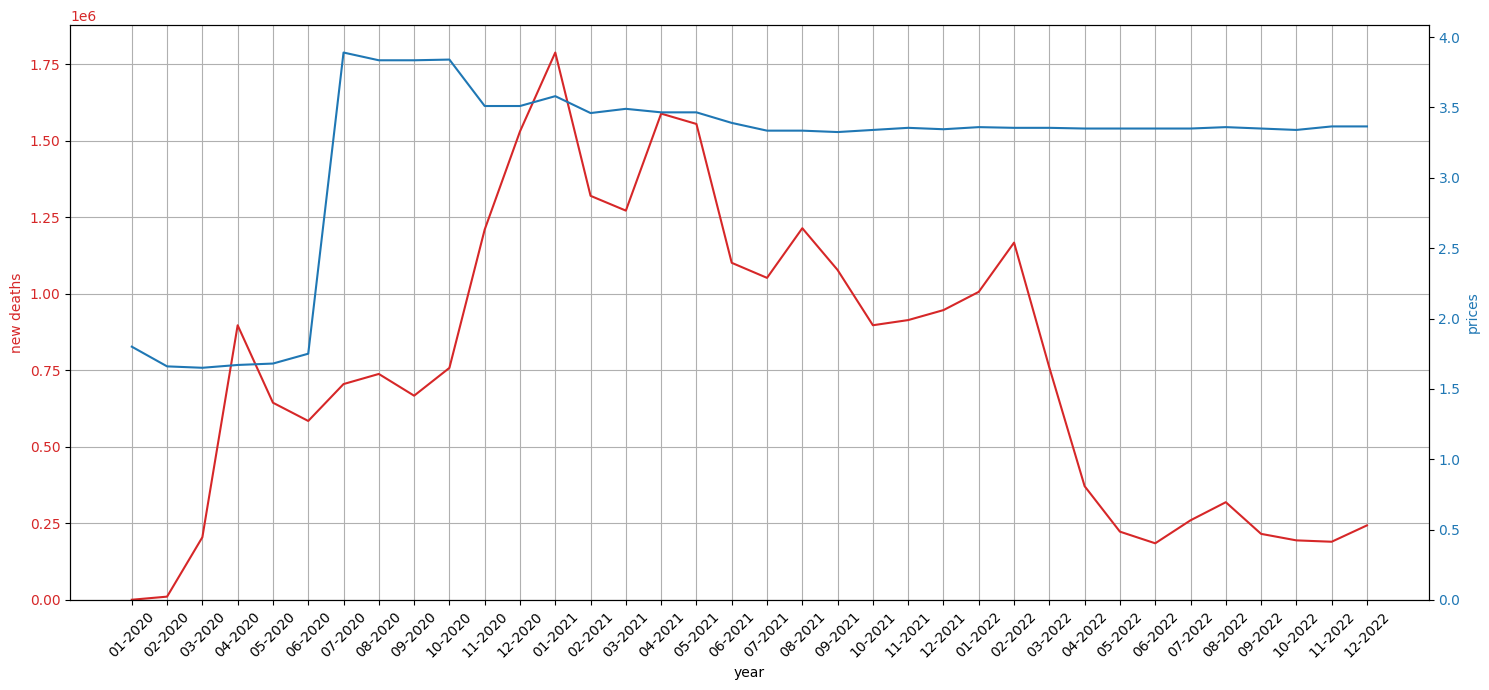

In [21]:

t = world_covid_df['date'].dt.strftime('%m-%Y') 
data2 = world_covid_df['avg_prices']
data1 = world_covid_df['new_deaths']

fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)


color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_xticklabels(t,rotation = 45)
ax1.set_ylabel('new deaths', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,max(data1)+max(data1)*0.01])
ax1.set_ylim([0,max(data1)+max(data1)*0.05])
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,max(data2)+max(data2)*0.05])
ax2.set_ylim([0,max(data2)+max(data2)*0.05])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.grid()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\1755445353.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



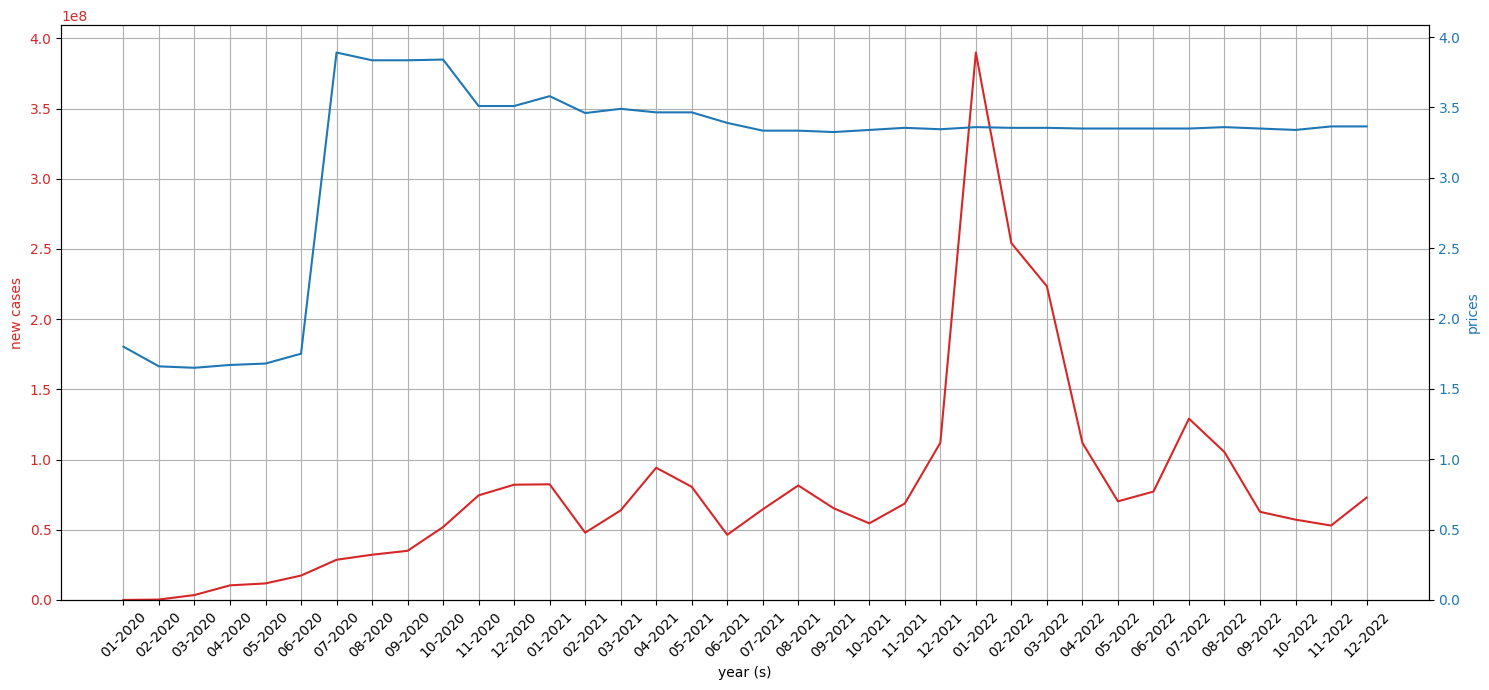

In [22]:

t = world_covid_df['date'].dt.strftime('%m-%Y') 
data2 = world_covid_df['avg_prices']
data1 = world_covid_df['new_cases']

fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)


color = 'tab:red'
ax1.set_xlabel('year (s)')
ax1.set_xticklabels(t,rotation = 45)
ax1.set_ylabel('new cases', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,max(data1)+max(data1)*0.05])
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,max(data2)+max(data2)*0.05])



fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.grid()
plt.show()

## the change of prices vs number of war deaths

In [23]:
deaths_df


,year,avg_prices,middle_east,world
0,2012,3.058333,54501,74065
1,2013,3.407083,73836,92797
2,2014,3.354167,81125,112722
3,2015,3.532083,69396,102369
4,2016,3.631957,56775,87300
5,2017,3.780486,35347,67885
6,2018,4.133889,20378,54914
7,2019,4.252847,10790,51244
8,2020,4.151875,8806,49304
9,2021,4.212292,39965,168795


### the change of prices vs number of war deaths ((in middle east))

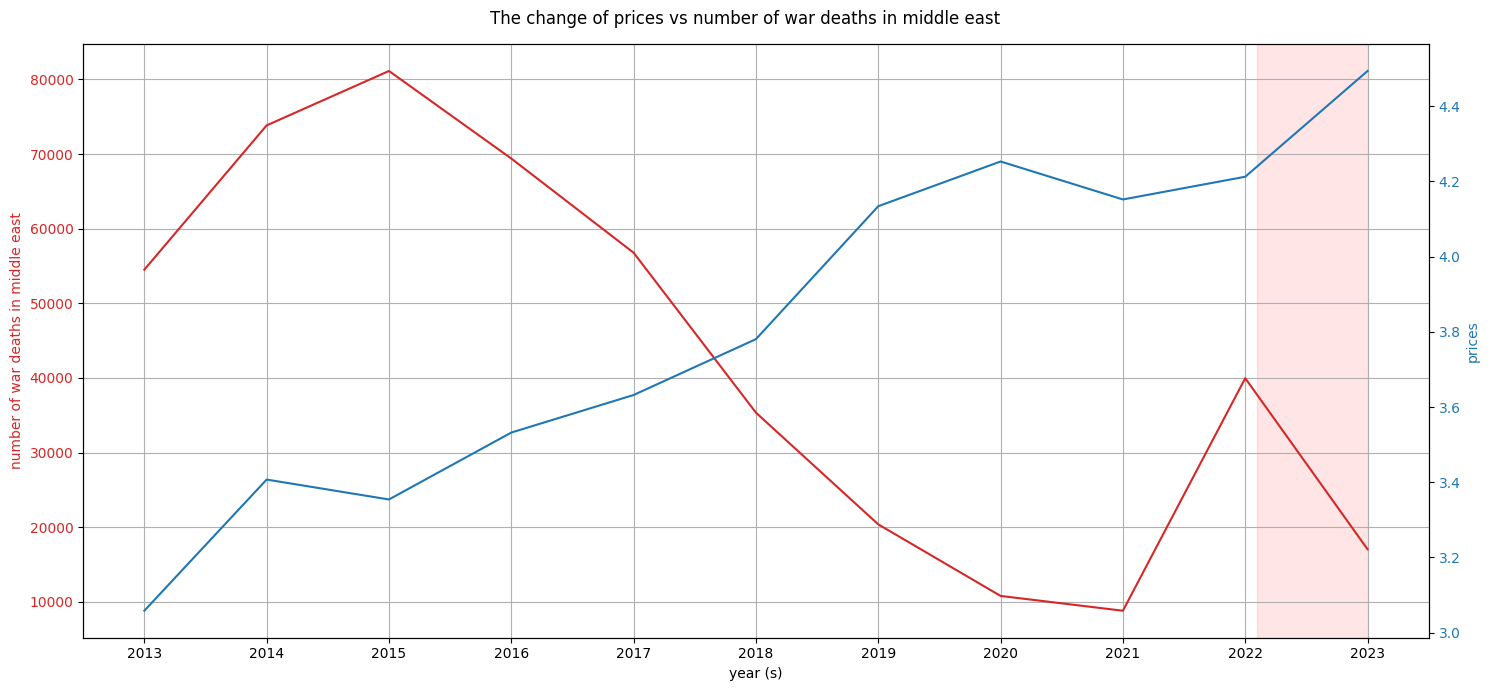

In [24]:
t = deaths_df['year']+1
data2 = deaths_df['avg_prices']
data1 = deaths_df['middle_east']

fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle("The change of prices vs number of war deaths in middle east")

color = 'tab:red'
ax1.set_xlabel('year (s)')
ax1.set_xticks(t)
ax1.axvspan(2022.1, 2023, alpha=0.1, color='r')

# ax1.set_xticklabels(t,rotation = 45)
ax1.set_ylabel('number of war deaths in middle east', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim([0,max(data1)+max(data1)*0.05])
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([0,max(data2)+max(data2)*0.05])

# ax2.set_ylim([0,10])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### the change of prices vs number of war deaths ((world))

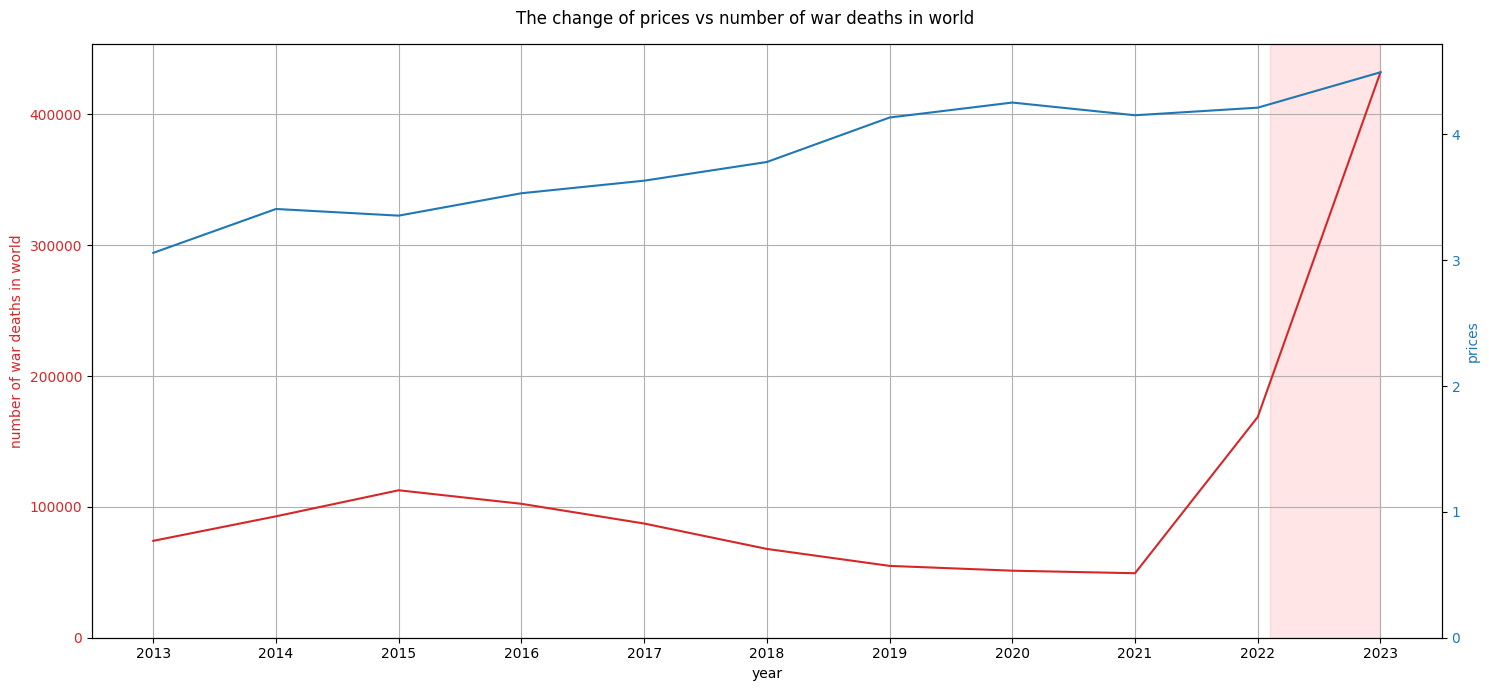

In [25]:
t = deaths_df['year']+1
data2 = deaths_df['avg_prices']
data1 = deaths_df['world']

fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle("The change of prices vs number of war deaths in world")

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_xticks(t)
ax1.axvspan(2022.1, 2023, alpha=0.1, color='r')

# ax1.set_xticklabels(t,rotation = 45)
ax1.set_ylabel('number of war deaths in world', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,max(data1)+max(data1)*0.05])
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,max(data2)+max(data2)*0.05])

# ax2.set_ylim([0,10])


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## 'annual_change_avg_prices vs  annual_change of population

In [26]:
population_df = population_df.loc[(population_df.year > 2012)]
population_df

,year,avg_prices,population,annual_change,annual_change_avg_prices
1,2013,3.407083,7694814,6.70,11.403270
2,2014,3.354167,8658026,12.52,-1.553137
3,2015,3.532083,9494246,9.66,5.304348
4,2016,3.631957,9964656,4.95,2.827600
5,2017,3.780486,10215381,2.25,4.089520
6,2018,4.133889,10459865,2.39,9.348078
7,2019,4.252847,10698683,2.28,2.877637
8,2020,4.151875,10928721,2.15,-2.374226
9,2021,4.212292,11148278,2.01,1.455166
10,2022,4.493472,11285869,1.23,6.675239


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


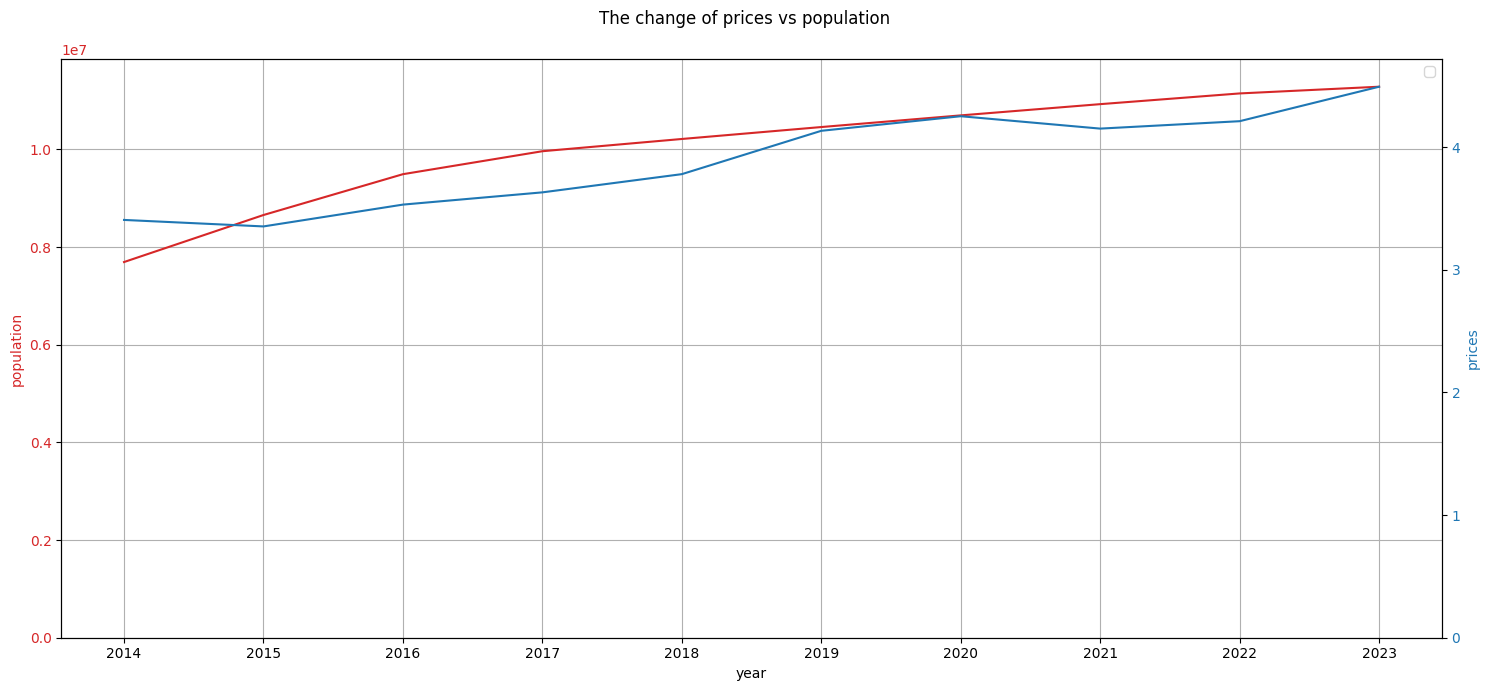

In [27]:
# x=population_df['year']
# y=population_df['annual_change_avg_prices']
# y2=population_df['annual_change']
# plt.plot(x,y,label="annual prices change")
# plt.plot(x,y2,label="annual change of population")
# plt.legend()

t = population_df['year']+1
data1 = population_df['population']
data2 = population_df['avg_prices']

fig, ax1 = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(7)
fig.suptitle("The change of prices vs population")

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_xticks(t)
# ax1.axvspan(2022.1, 2023, alpha=0.1, color='r')

# ax1.set_xticklabels(t,rotation = 45)
ax1.set_ylabel('population', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0,max(data1)+max(data1)*0.05])
plt.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('prices', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,max(data2)+max(data2)*0.05])



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.legend()
plt.show()


In [28]:
print(f"H0: the increasing of population increases the prices") 
print(f"H1: the increasing of population does not effect the prices") 

a, p_value = weightstats.ztest(population_df['annual_change_avg_prices'], alternative="two-sided")
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Null hyphothesis rejected")
else:
    print("Null hyphothesis cannot be rejected")

H0: the increasing of population increases the prices
H1: the increasing of population does not effect the prices
0.0038505330783533886
Null hyphothesis rejected


## the effect of ramdan

#### the of price change over 11 year for commodity = Oil (vegetable)

In [29]:
df2=df[(df['category']==thecategory)].groupby(['H-year','H-month'])['price'].mean().reset_index(name='price_change')
df2["date"] = (df2["H-month"].astype(str) + "-" + df2["H-year"].astype(str)).apply(lambda x : (datetime.datetime.strptime(x,"%m-%Y")).strftime("%Y-%m"))
# df['date']=pd.to_datetime(df2['date'].index,format='%m-%Y')
# df2.price_change=df2.price_change.pct_change()*100


df2.head(5 )

,H-year,H-month,price_change,date
0,1433,2,1.80,1433-02
1,1433,3,1.66,1433-03
2,1433,4,1.65,1433-04
3,1433,5,1.67,1433-05
4,1433,6,1.68,1433-06


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\1990342893.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



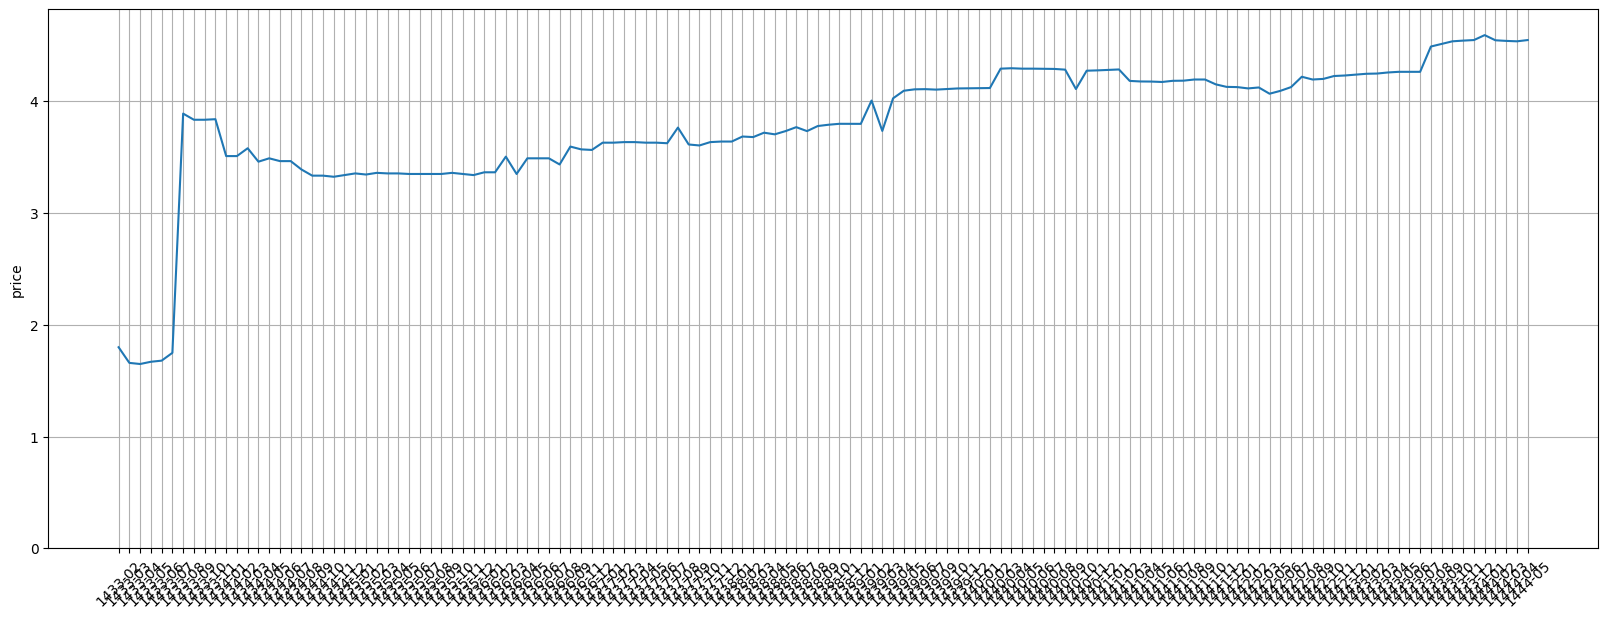

In [30]:

x = df2['date']
y = df2['price_change']

fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(7)

# ax.axvspan(1433, 1443, al
# pha=0.1, color='r')

# ax.set_xlabel()
# ax.set_xticks(x)
ax.set_xticklabels(x,rotation = 45)
ax.set_ylabel('price')
ax.plot(x,y)
ax.tick_params(axis='y')
ax.set_ylim([0,max(y)+max(y)*0.05])

plt.grid()
plt.show()

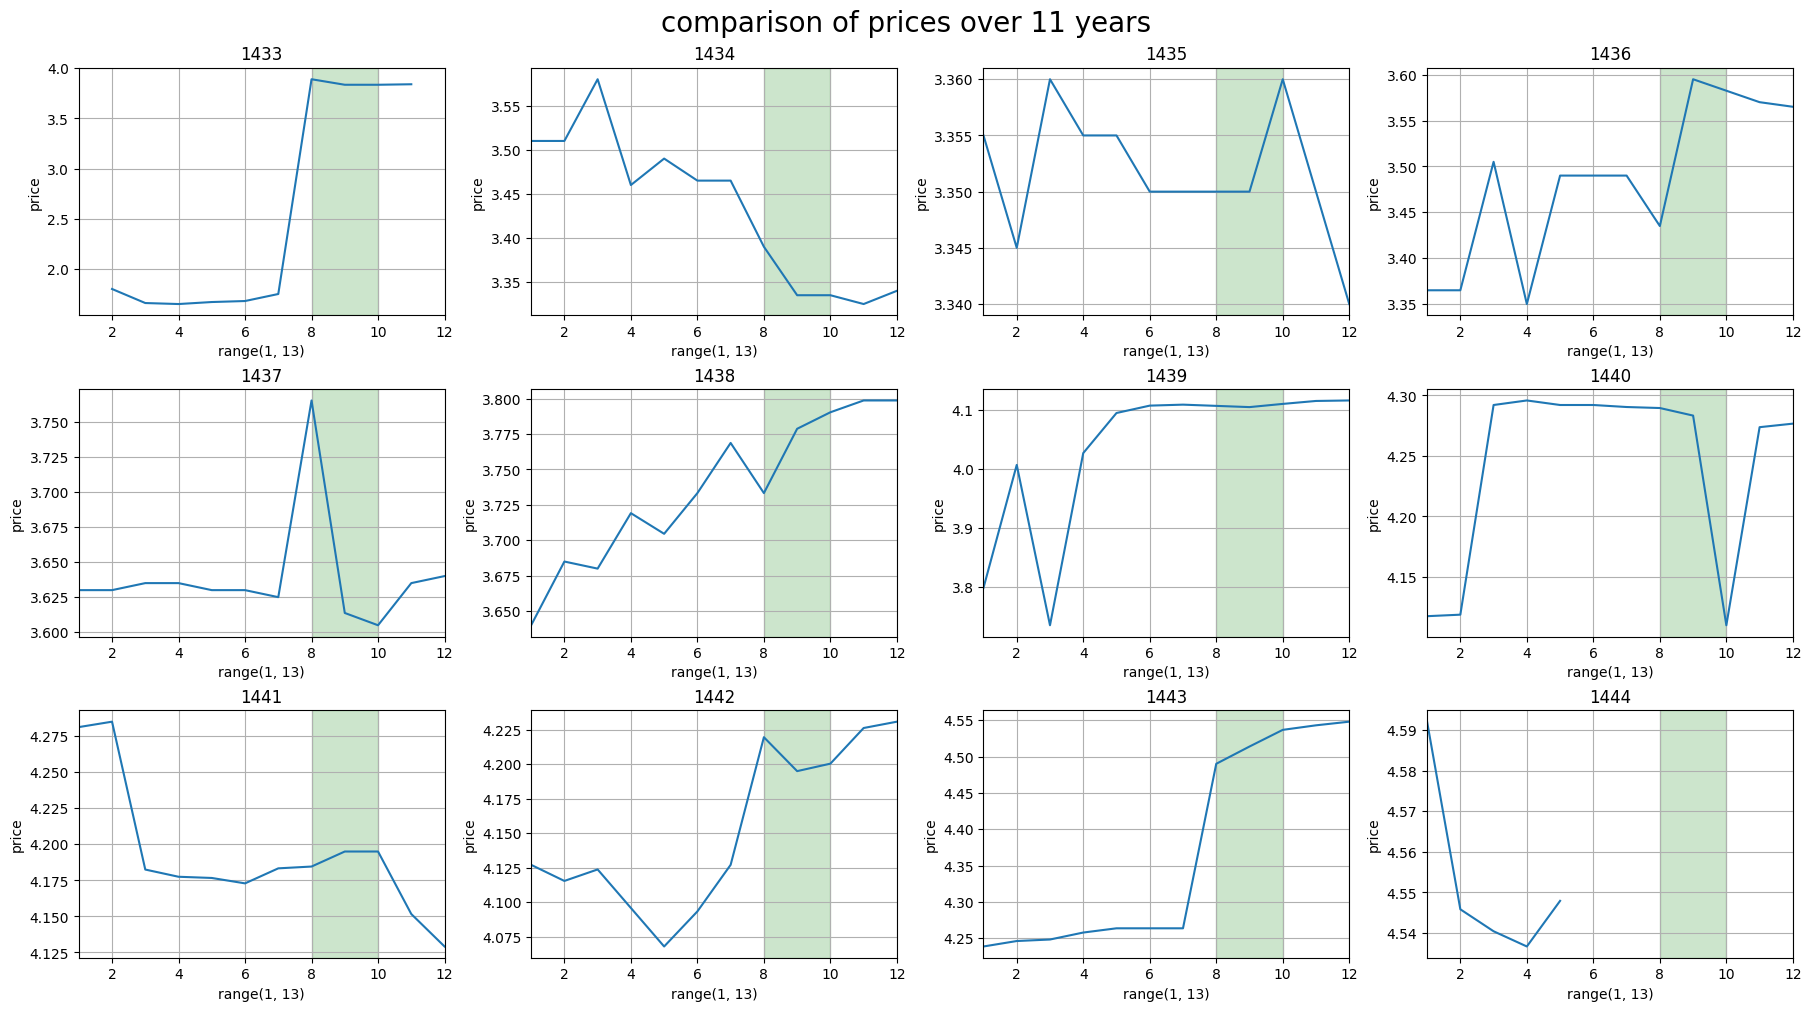

In [31]:
fig, axs = plt.subplots(len(df2['H-year'].unique())//4, 4, figsize=(18, 10), constrained_layout=True)
fig.suptitle('comparison of prices over 11 years',fontsize=20)
for ax,i in  zip(axs.flat,df2['H-year'].unique()):
    data=df2[df2['H-year']==i]
    x=data['H-month']
    y=data['price_change']
    ax.plot(x,y)
    ax.grid()
    ax.set_xlabel('month')
    ax.set_ylabel('price')
    ax.axvspan(8, 10, alpha=0.2, color='green')
    ax.set_xlim([1,12])
    # ax.set_ylim([0.9,1.4])
    ax.set_xlabel(range(1,13,1))
    ax.set_title(i)

#### the mean of price change for h-month = 8 and commodity 
* droping 2012 for being outlayer ((rice ))

In [32]:
df2=df[df['commodity']=='Oil (vegetable)'].groupby(['H-year','H-month'])['price'].mean().pct_change(periods=1).reset_index(name='price_change')
df2.price_change=df2.price_change*100
df2=df2[(df2['H-month']==8)]
# print(df2)
print(f"the mean : {df2['price_change'].mean()}")
df2.head(15)

the mean : 4.080983221790964


,H-year,H-month,price_change
6,1433,8,13.714286
17,1434,8,3.225806
29,1435,8,0.000000
41,1436,8,-0.564972
52,1437,8,-2.673797
64,1438,8,-1.373980
87,1440,8,-0.091449
99,1441,8,0.138058
110,1442,8,10.372566
122,1443,8,18.063315


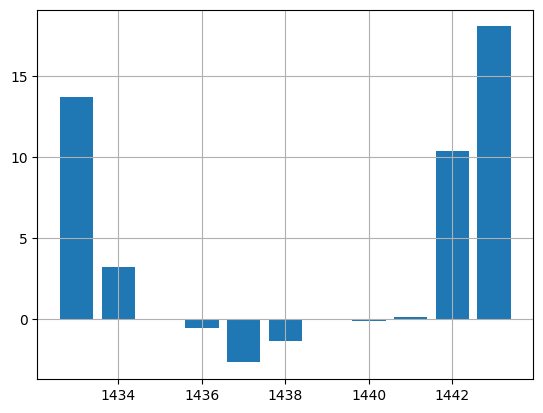

In [33]:
plt.bar(df2['H-year'],df2['price_change'])
plt.grid()

In [34]:

print("H0: before ramdan increase the prices")
print("H1: before ramdan dose not effect the prices") # true

a, p_value = weightstats.ztest(df2['price_change'], alternative="two-sided")
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Null hyphothesis rejected")
else:
    print("Null hyphothesis cannot be rejected")

H0: before ramdan increase the prices
H1: before ramdan dose not effect the prices
0.07572971665465986
Null hyphothesis cannot be rejected


#### the mean of price change for h-month = 9 (ramdan) and commodity 

In [35]:
df2=df[df['commodity']=='Oil (vegetable)'].groupby(['H-year','H-month'])['price'].mean().pct_change(periods=1).reset_index(name='price_change')
df2.price_change=df2.price_change*100
df2=df2[(df2['H-month']==9)]
# print(df2)
print(f"the mean : {df2['price_change'].mean()}")
df2.head(15)

the mean : -0.9837941625770319


,H-year,H-month,price_change
7,1433,9,-5.527638
18,1434,9,-5.729167
30,1435,9,0.000000
42,1436,9,0.000000
53,1437,9,1.053114
65,1438,9,1.828472
76,1439,9,-1.462118
88,1440,9,-0.503432
100,1441,9,0.367647
111,1442,9,-2.646720


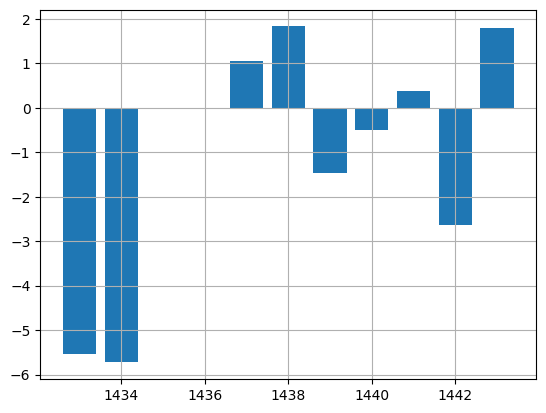

In [36]:
plt.bar(df2['H-year'],df2['price_change'])
plt.grid()

In [37]:
v = 3
print(f"H0: ramdan dose not effect the prices") 
print(f"H1: ramdan decrease the prices in {v} %")  

a, p_value = weightstats.ztest(df2['price_change'], value=v, alternative="smaller")
print(p_value)
alpha = 0.05
if p_value < alpha:
    print("Null hyphothesis rejected")
else:
    print("Null hyphothesis cannot be rejected")

H0: ramdan dose not effect the prices
H1: ramdan decrease the prices in 3 %
2.9299833967554064e-07
Null hyphothesis rejected


#### the of price change over 11 year for categories

<AxesSubplot: xlabel='H-month', ylabel='year'>

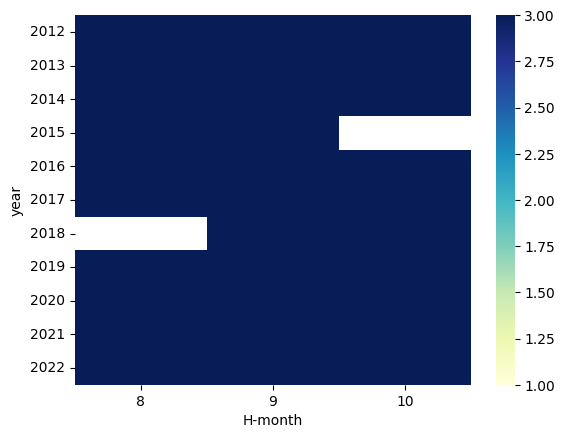

In [38]:
# create sample data
data =df[(df['is_ramdan'])& (df['category']==thecategory)]
table = pd.pivot_table(data, values='price', index='year', columns='H-month')

# create heat map
sns.heatmap(table, cmap='YlGnBu', annot=False, fmt='g',vmin=1,vmax=3)

## 

# price changes with respect to market

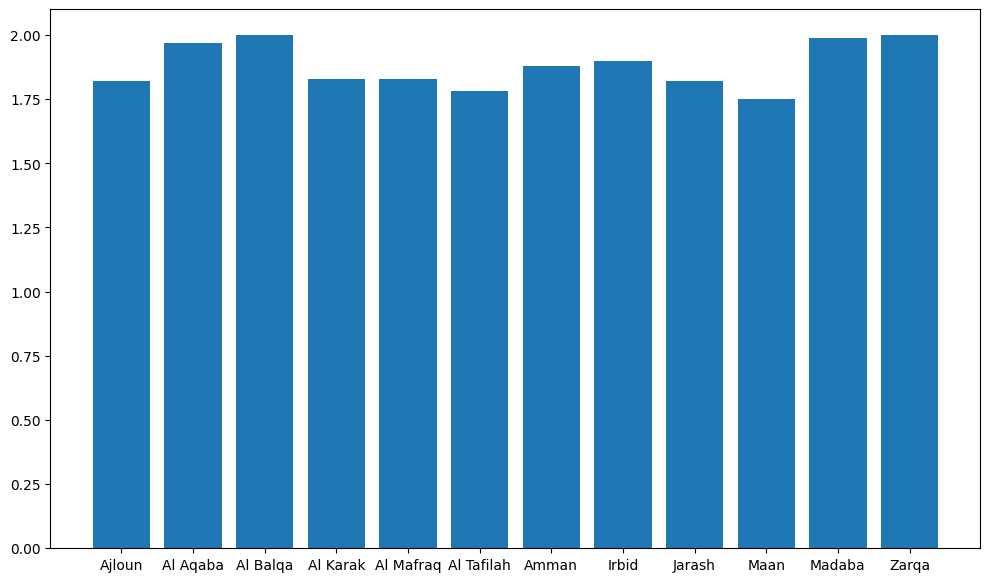

In [39]:
test = df[(df['year'] == 2017) & (df['commodity'] == 'Oil (vegetable)') & (df['month'] == 1)]
market = test['market'].head(12)
price = test['price'].head(12)

# Figure Size
fig = plt.figure(figsize =(12, 7))

# Horizontal Bar Plot
plt.bar(market, price)

# Show Plot
plt.show()

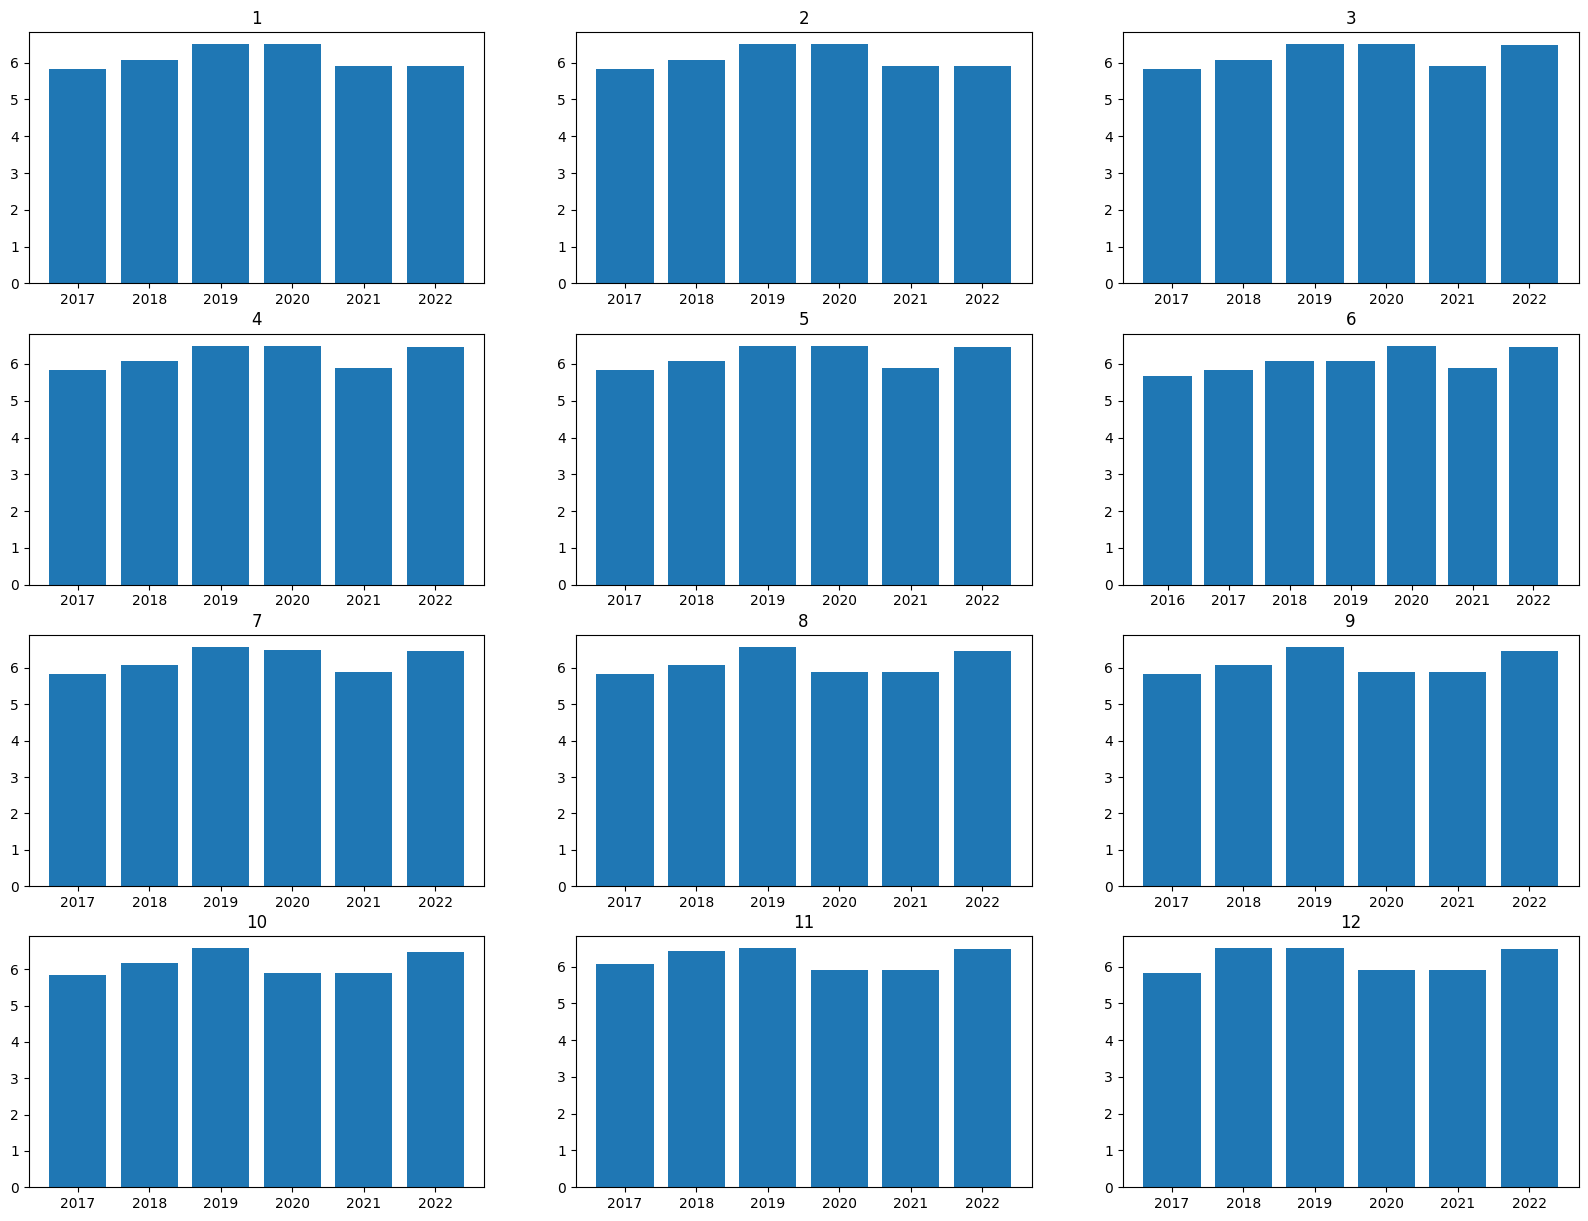

In [40]:
# test = df[(df['year'] == 2017) & (df['commodity'] == 'Oil (vegetable)') & (df['month'] == 2)]
figure, axis = plt.subplots(4, 3)
figure.set_figwidth(20)
figure.set_figheight(15)
r = 0
for m in range(1,13):
  test = df[(df['market'] == 'Irbid') & (df['category'] == thecategory) & (df['month'] == m)]
  years = test['year']
  price = test['price']

  # Figure Size
  # fig = plt.figure(figsize =(12, 7))

  # Horizontal Bar Plot
  axis[r, (m-1)%3].bar(years, price)
  axis[r, (m-1)%3].set_title(m)
  # axis[r, (m-1)%3].figure(figsize =(12, 7))
  if((m-1)%3 == 2):
    r+=1

# Show Plot
plt.show()

# avg prices for diffrent commodity


In [41]:
df[df['year']==2014].groupby('commodity')['price'].mean()

commodity
Apples (red)               2.299167
Bananas                    0.860833
Beans (fava, dry)          1.545833
Bread (pita)               0.170000
Cheese (white, boiled)     5.251667
Chickpeas                  1.759167
Cucumbers                  0.639167
Eggs                       3.243333
Garlic                     1.919167
Lentils                    1.187500
Meat (beef)                9.532500
Meat (chicken)             2.264167
Meat (chicken, whole)      1.767500
Meat (lamb)               11.740000
Milk (pasteurized)         1.155833
Oil (olive)                4.920000
Oil (vegetable)            1.788333
Onions                     0.598333
Oranges (big size)         1.069000
Potatoes                   0.748333
Rice (imported)            1.208333
Sugar                      0.728333
Tomatoes                   0.566667
Name: price, dtype: float64

In [42]:
df[df['year']==2022].groupby('commodity')['price'].mean()

commodity
Apples (red)              1.387153
Bananas                   0.875152
Beans (fava, dry)         1.515694
Bread (pita)              0.323125
Bulgur                    0.896597
Cheese (picon)            0.774028
Cheese (white, boiled)    5.728819
Chickpeas                 1.863750
Cucumbers                 0.577500
Eggs                      2.655972
Fish (tuna, canned)       1.117361
Fuel (diesel)             0.719167
Fuel (gas)                7.000000
Fuel (kerosene)           0.715833
Fuel (petrol-gasoline)    0.904167
Garlic                    3.186806
Lentils                   1.262847
Meat (beef)               8.508403
Meat (chicken)            2.210486
Meat (chicken, whole)     1.542639
Meat (lamb)               9.980625
Milk (pasteurized)        1.097361
Milk (powder)             3.916111
Oil (olive)               6.338125
Oil (vegetable)           2.648819
Onions                    0.547014
Oranges (big size)        1.182816
Pasta                     0.362431
Potatoes  

In [43]:
df[df['category']=='non-food'].groupby('month')['price'].mean()

month
1     2.546304
2     2.549565
3     2.550870
4     2.546957
5     2.553043
6     2.574783
7     2.584710
8     2.591739
9     2.594348
10    2.598261
11    2.603478
12    2.602174
Name: price, dtype: float64

(0.0, 1.0)

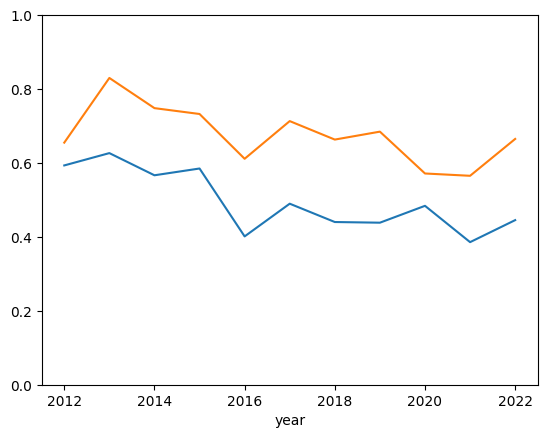

In [44]:
df[df['commodity']=='Tomatoes'].groupby('year')['price'].mean().plot()
df[df['commodity']=='Potatoes'].groupby('year')['price'].mean().plot()
plt.ylim([0,1])

<AxesSubplot: xlabel='year,month'>

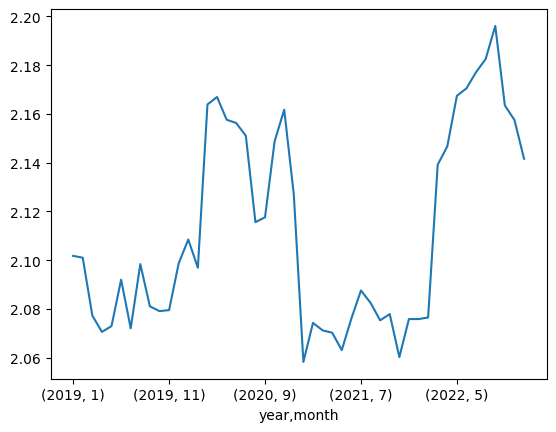

In [45]:
df[(df['year']>2018)].groupby(['year','month'])['price'].mean().plot(x='month',y='price')
# plt.ylim()

In [46]:
df[df['commodity']=='Oil (vegetable)'][df['market']=='Amman'][df.year==2022][['month','price']]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2035138417.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,month,price
26145,1,2.32
26557,2,2.32
26972,3,2.65
27391,4,2.68
27810,5,2.74
28228,6,2.74
28644,7,2.77
29058,8,2.77
29471,9,2.78
29884,10,2.79


In [47]:
avg=df[df['commodity']=='Oil (vegetable)'].groupby('month')['price'].mean().reset_index(name="avg_price")
avg

,month,avg_price
0,1,1.924286
1,2,1.918052
2,3,2.024805
3,4,2.026883
4,5,2.026364
5,6,2.026705
6,7,2.043766
7,8,2.047013
8,9,2.047922
9,10,2.048312


# data exploration

In [48]:
df.groupby('year')['commodity'].unique()


year
2012    [Bread (pita), Rice (imported), Oil (vegetable...
2013    [Bread (pita), Potatoes, Rice (imported), Eggs...
2014    [Bread (pita), Potatoes, Rice (imported), Eggs...
2015    [Bread (pita), Potatoes, Rice (imported), Eggs...
2016    [Bread (pita), Potatoes, Rice (imported), Eggs...
2017    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2018    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2019    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2020    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2021    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
2022    [Bread (pita), Bulgur, Pasta, Potatoes, Rice (...
Name: commodity, dtype: object

In [49]:
df['category'].value_counts()

vegetables and fruits    6965
meat, fish and eggs      5450
cereals and tubers       5238
milk and dairy           3483
non-food                 3312
pulses and nuts          2749
oil and fats             1864
miscellaneous food       1793
Name: category, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2806511603.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2806511603.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2806511603.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2806511603.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2806511603.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2806511603.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2806511603.py:2: UserWarning:

Boolean Series key will be reindexed to ma

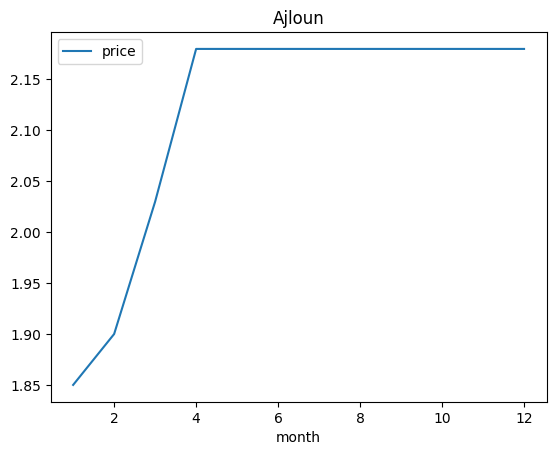

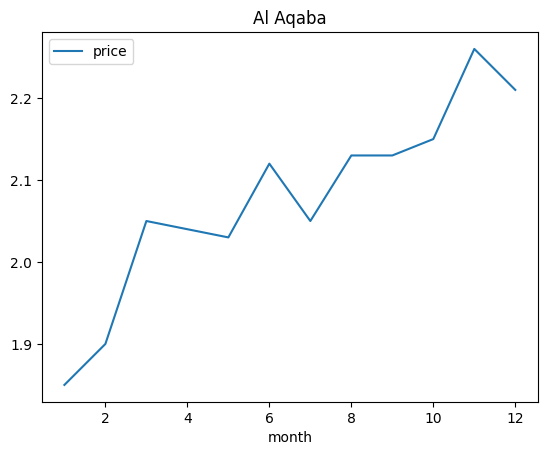

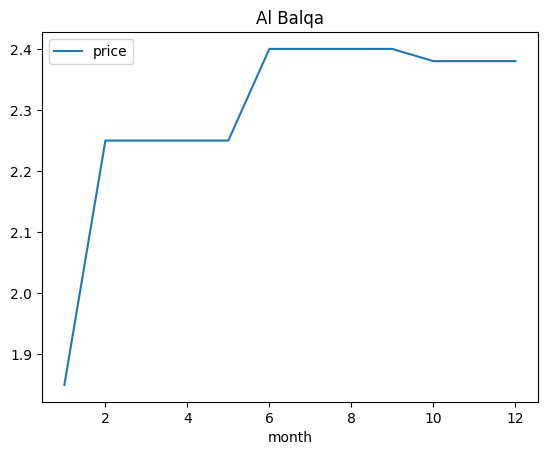

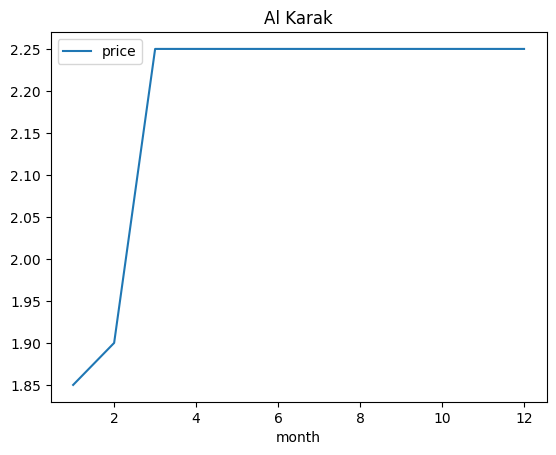

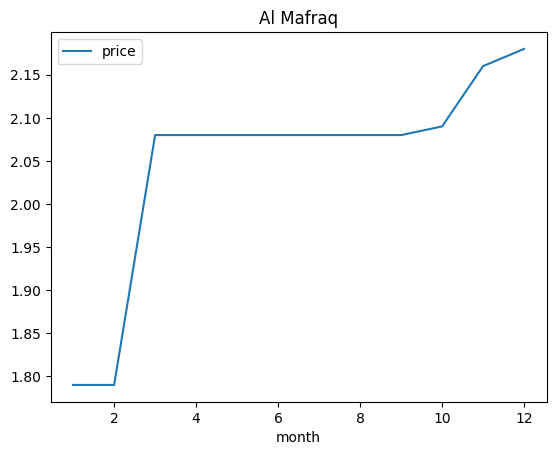

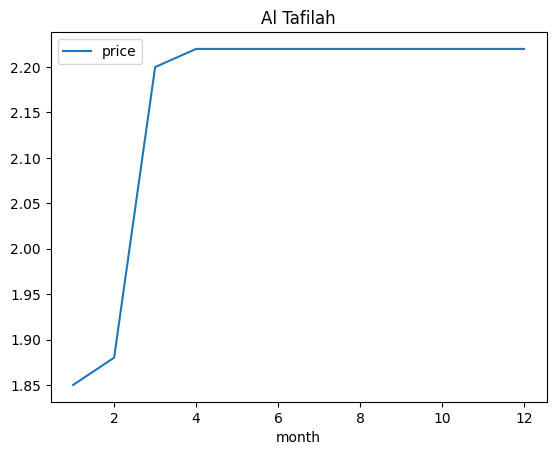

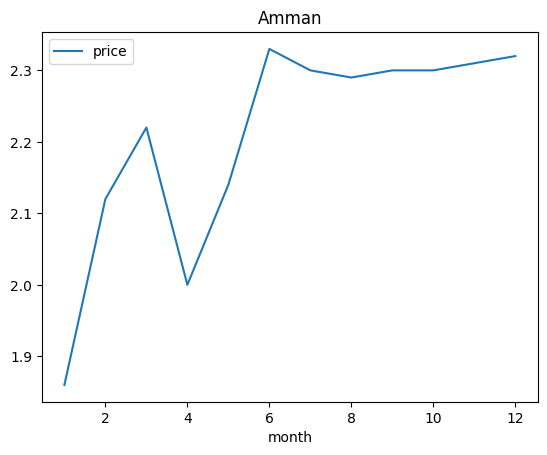

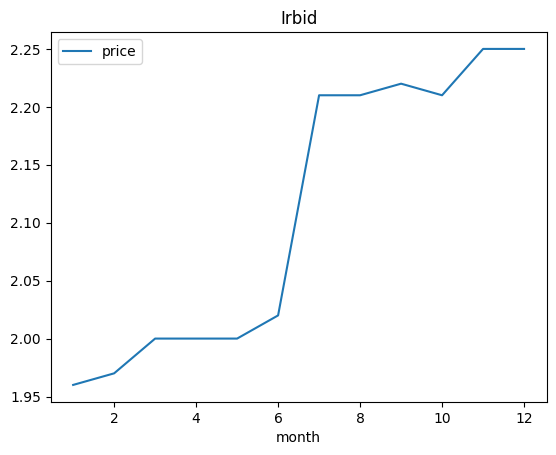

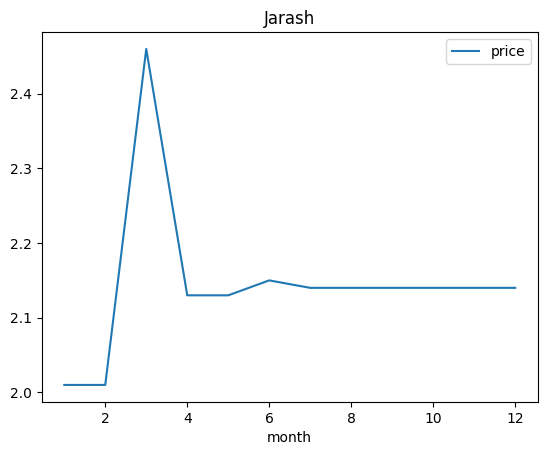

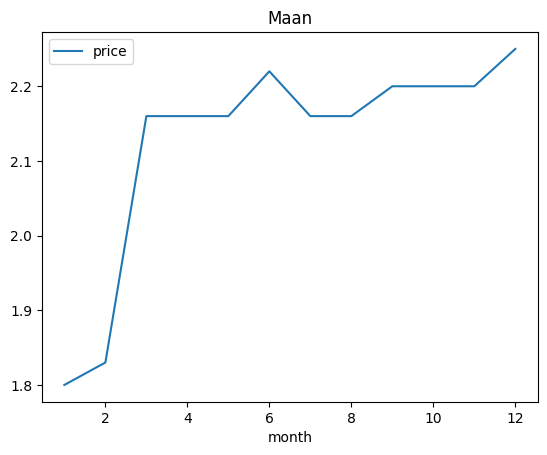

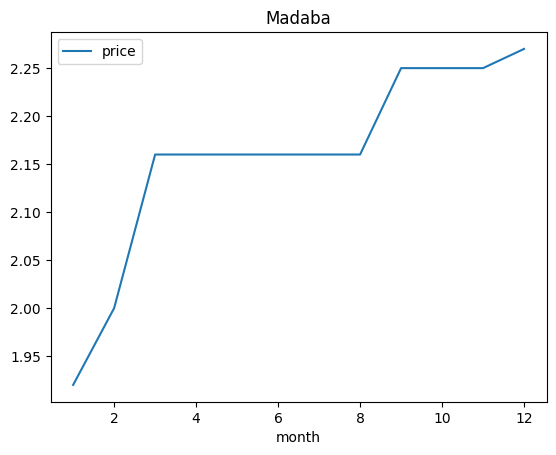

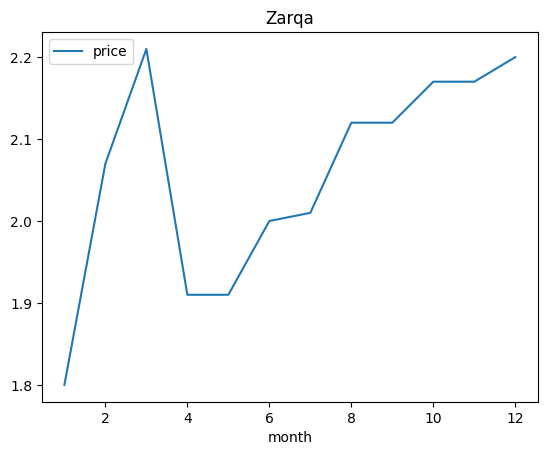

In [50]:
for i in df['market'].unique()[1:]:
    df[df['commodity']=='Oil (vegetable)'][df['market']==i][df.year==2021][['month','price']].plot(x='month',y='price')
    plt.title(i)
    plt.xticks()
    #plt.xlim([0,13])
    #plt.ylim([0,3])


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2379536583.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2379536583.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2379536583.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2379536583.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2379536583.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2379536583.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11108\2379536583.py:2: UserWarning:

Boolean Series key will be reindexed to ma

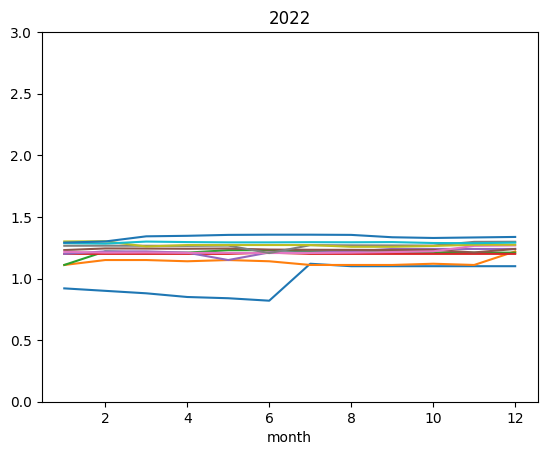

In [51]:
for i in df['year'].unique():
    df[df['commodity']=='Rice (imported)'][df.year==i].groupby('month')['price'].mean().plot(x='month')
    plt.title(i)
    plt.ylim([0,3])
    

In [52]:
df.isna().sum()

date         0
market       0
category     0
commodity    0
unit         0
price        0
month        0
year         0
H-month      0
H-year       0
is_ramdan    0
dtype: int64

In [53]:
len(df['market'].value_counts()
)

13

In [54]:
df['category'].value_counts()

vegetables and fruits    6965
meat, fish and eggs      5450
cereals and tubers       5238
milk and dairy           3483
non-food                 3312
pulses and nuts          2749
oil and fats             1864
miscellaneous food       1793
Name: category, dtype: int64

In [55]:
len(df['commodity'].value_counts()
)

36

In [56]:
df['unit'].value_counts()


KG         18987
L           4103
12.5 KG     1008
1.8 L        935
2 KG         929
300 G        875
160 G        875
750 G        864
170 G        840
0.8 KG       756
1.5 KG       682
Name: unit, dtype: int64

In [57]:
df['price'].describe()

count    30854.000000
mean         2.122951
std          2.437240
min          0.150000
25%          0.660000
50%          1.130000
75%          2.250000
max         12.250000
Name: price, dtype: float64